In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.stats import kstest


In [74]:
df=pd.read_csv('/content/Prêt immo.csv')
df.head(5) #afficher les 5 premier ligne

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
df.describe() # afficher les statistiques descriptives

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [76]:
df #afficher la data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [77]:
df.isnull().sum() # afficher le nombre de valeur manquantes dans chaque colonne


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [78]:
df.dtypes # afficher le type de chaque colonne


,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='LoanAmount'>

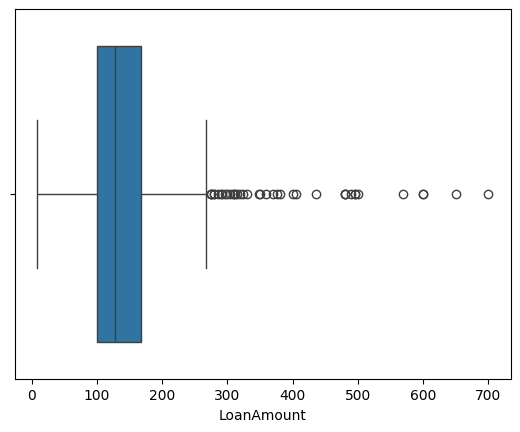

In [79]:

import seaborn as sns
sns.boxplot(x=df['LoanAmount']) # afficher le boxplot de la colonne LoanAmount
 #la courbe contien des autlier dans en le changer avec mediannne

In [80]:
import numpy as np
from sklearn.impute import SimpleImputer

# Initialiser l'Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Ajuster et transformer les données de la colonne 'LoanAmount'
df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']])  # Utilisez une DataFrame pour la colonne 'Age'
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [81]:
df.isnull().sum() # afficher le nombre de valeur manquantes dans chaque colonne


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Loan_Amount_Term'>

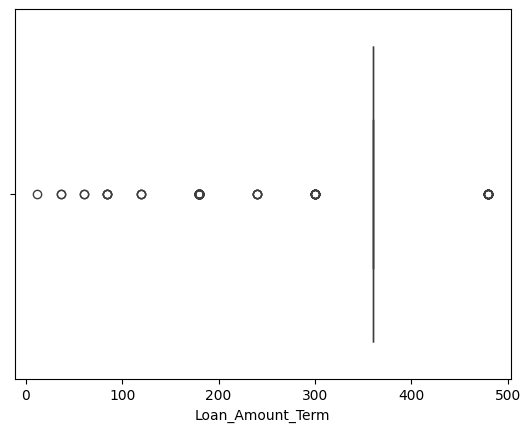

In [82]:
import seaborn as sns
sns.boxplot(x=df['Loan_Amount_Term']) # afficher le boxplot de la colonne Loan_Amount_Term
 #la courbe contien des autlier dans en le changer avec mediannne

In [83]:
kstest(df['Loan_Amount_Term'].dropna(),'norm')# on utliste kstest car la base de donne > 50 observation p_value < 0.05  => on utise la medianne

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=12.0, statistic_sign=-1)

In [84]:
import numpy as np
from sklearn.impute import SimpleImputer

# Initialiser l'Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Ajuster et transformer les données de la colonne 'LoanAmount'
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])  # Utilisez une DataFrame pour la colonne 'Age'
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [85]:
df.isnull().sum() # afficher le nombre de valeur manquantes dans chaque colonne


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Credit_History'>

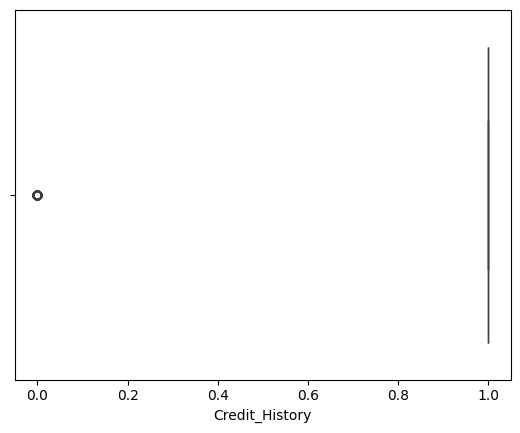

In [86]:
import seaborn as sns
sns.boxplot(x=df['Credit_History']) # afficher le boxplot de la colonne Credit_History
 #la courbe contien des autlier dans en le changer avec mediannne

In [87]:
kstest(df['Credit_History'].dropna(),'norm')# on utliste kstest car la base de donne > 50 observation p_value > 0.05  => on utise la moyenne

KstestResult(statistic=0.6835433276288266, pvalue=2.709657362044086e-262, statistic_location=1.0, statistic_sign=-1)

In [88]:
import numpy as np
from sklearn.impute import SimpleImputer

#Initialiser l'Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Ajuster et transformer les données de la colonne 'Credit_History'
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])  # Utilisez une DataFrame pour la colonne 'Credit_History'
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [89]:
df.isnull().sum() # afficher le nombre de valeur manquantes dans chaque colonne


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [90]:
# on change les valeurs discret avec les most frequante

In [91]:
Impeter=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df.iloc[:, [1]] = Impeter.fit_transform(df.iloc[:, [1]])#remplacer la colonne Gender
df.iloc[:, [2]] = Impeter.fit_transform(df.iloc[:, [2]])#remplacer la colonne married
df.iloc[:, [3]] = Impeter.fit_transform(df.iloc[:, [3]])#remplacer la colonne dependent
df.iloc[:, [5]] = Impeter.fit_transform(df.iloc[:, [5]])
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [92]:
df.isnull().sum() # afficher le nombre de valeur manquantes dans chaque colonne


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<ipython-input-93-acc4bfff0cf7>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='blue', ax=axes[0])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


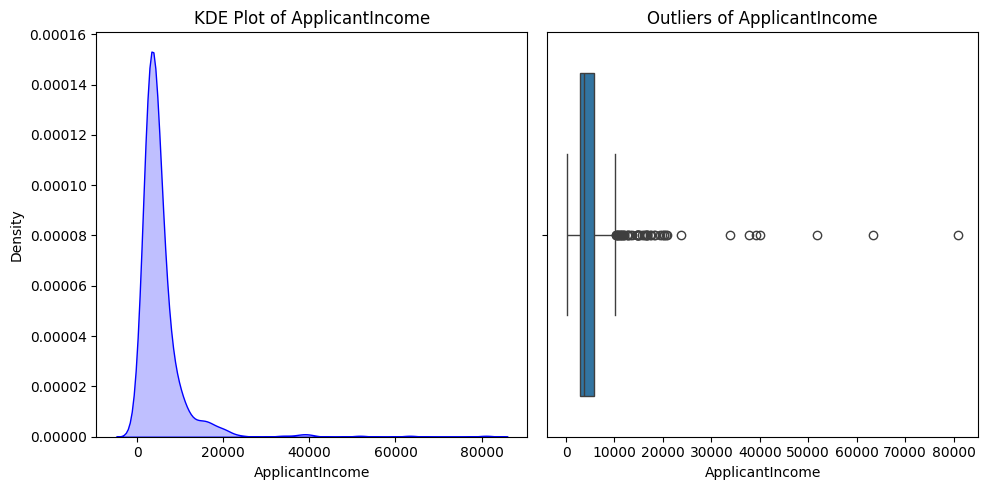

<ipython-input-93-acc4bfff0cf7>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='blue', ax=axes[0])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


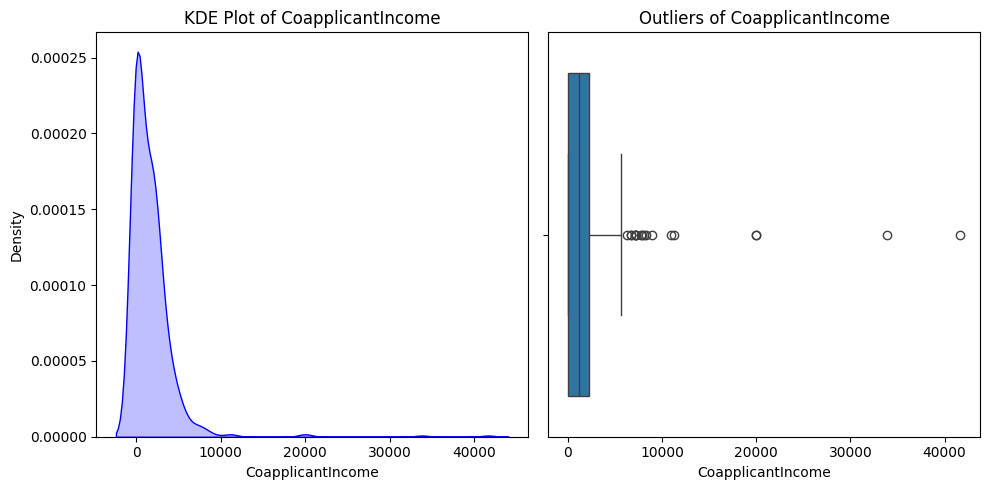

<ipython-input-93-acc4bfff0cf7>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='blue', ax=axes[0])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


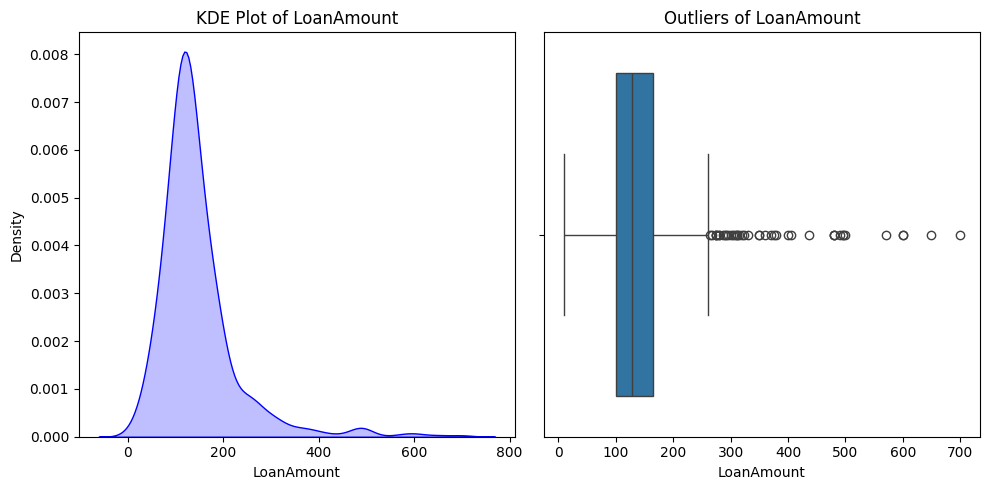

<ipython-input-93-acc4bfff0cf7>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='blue', ax=axes[0])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


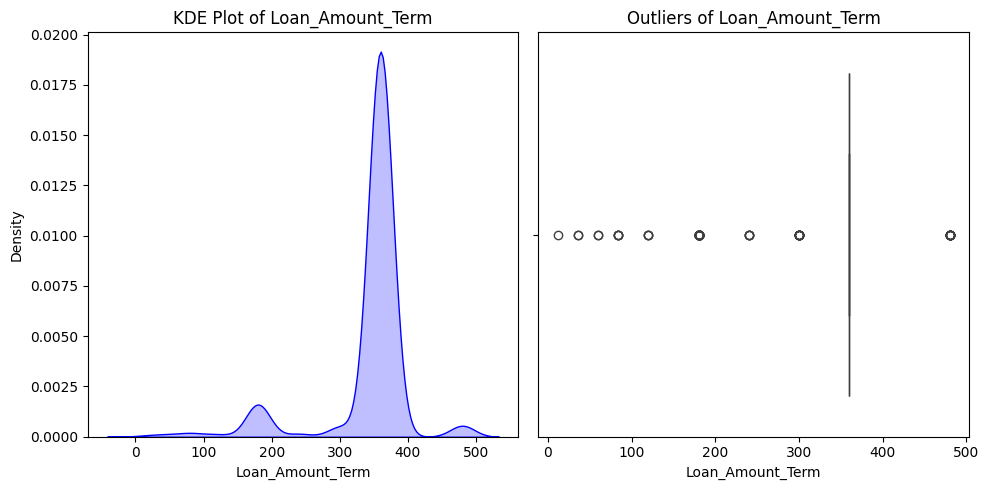

<ipython-input-93-acc4bfff0cf7>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='blue', ax=axes[0])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


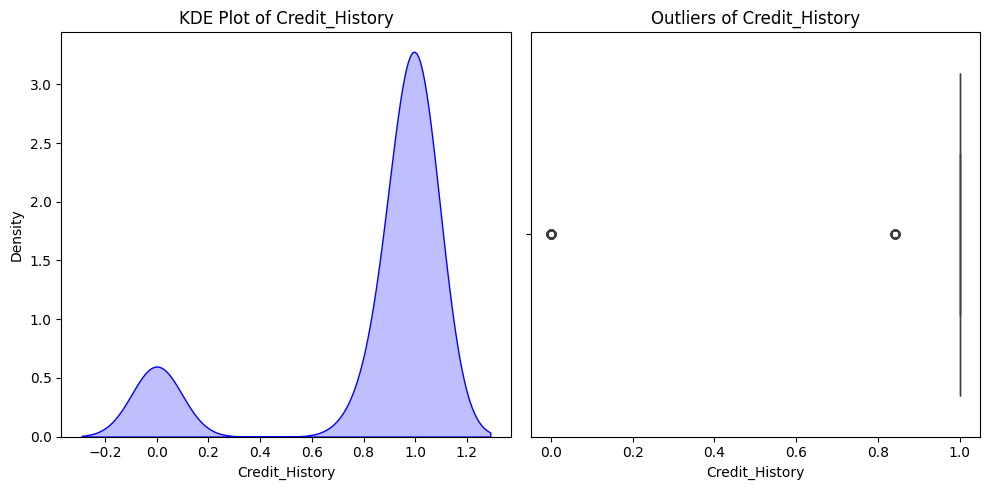

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes numériques
numeric = df.select_dtypes(include='number')

# Parcourir les colonnes numériques
for col in numeric:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # KDE Plot pour vérifier la symétrie
    sns.kdeplot(df[col], shade=True, color='blue', ax=axes[0])
    axes[0].set_title(f'KDE Plot of {col}')

    # Boxplot pour identifier les outliers
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Outliers of {col}')

    # Afficher les graphes
    plt.tight_layout()
    plt.show()
    # pour conserver les Outliers on fait le stendarisation


In [94]:
from sklearn.preprocessing import StandardScaler #importer la classe standartScaler
sc=StandardScaler()
numeric=df.select_dtypes(np.number)
for col in numeric:
  df[col]=sc.fit_transform(df[[col]])

In [95]:
from sklearn.preprocessing import LabelEncoder #importer la classe LabelEncoder
labelencoder=LabelEncoder()

object=df.select_dtypes("object")#on utilise LabelEncoder pour changer le discert en contenue

for col in object:

  df[col] = labelencoder.fit_transform(df[[col]])
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.451640,2,1
1,1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.451640,0,0
2,2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.451640,2,1
3,3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.451640,2,1
4,4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.451640,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,-0.410130,-0.554487,-0.889500,0.273231,0.451640,0,1
610,610,1,1,3,0,0,-0.212557,-0.554487,-1.258378,-2.522836,0.451640,0,1
611,611,1,1,1,0,0,0.437174,-0.472404,1.276168,0.273231,0.451640,2,1
612,612,1,1,2,0,0,0.357064,-0.554487,0.490816,0.273231,0.451640,2,1


In [96]:
df.drop('Loan_ID',axis=1,inplace=True) #on supprime la colonne Loan_ID

In [97]:
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.451640,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.451640,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.451640,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.451640,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.451640,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-0.889500,0.273231,0.451640,0,1
610,1,1,3,0,0,-0.212557,-0.554487,-1.258378,-2.522836,0.451640,0,1
611,1,1,1,0,0,0.437174,-0.472404,1.276168,0.273231,0.451640,2,1
612,1,1,2,0,0,0.357064,-0.554487,0.490816,0.273231,0.451640,2,1


In [98]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer([("encoder",OneHotEncoder(),[0,1,2,3,4,10] )],remainder='passthrough')
dataset=ct.fit_transform(df)
r=ct.get_feature_names_out()

df=pd.DataFrame(dataset,columns=r)
df

,encoder__Gender_0,encoder__Gender_1,encoder__Married_0,encoder__Married_1,encoder__Dependents_0,encoder__Dependents_1,encoder__Dependents_2,encoder__Dependents_3,encoder__Education_0,encoder__Education_1,...,encoder__Self_Employed_1,encoder__Property_Area_0,encoder__Property_Area_1,encoder__Property_Area_2,remainder__ApplicantIncome,remainder__CoapplicantIncome,remainder__LoanAmount,remainder__Loan_Amount_Term,remainder__Credit_History,remainder__Loan_Status
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.072991,-0.554487,-0.211241,0.273231,0.451640,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,-0.134412,-0.038732,-0.211241,0.273231,0.451640,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,-0.393747,-0.554487,-0.948996,0.273231,0.451640,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.462062,0.251980,-0.306435,0.273231,0.451640,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.097728,-0.554487,-0.056551,0.273231,0.451640,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,-0.410130,-0.554487,-0.889500,0.273231,0.451640,1.0
610,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,-0.212557,-0.554487,-1.258378,-2.522836,0.451640,1.0
611,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.437174,-0.472404,1.276168,0.273231,0.451640,1.0
612,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.357064,-0.554487,0.490816,0.273231,0.451640,1.0


In [99]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1].values #tou
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train
x_test

array([[ 0.        ,  1.        ,  1.        , ..., -0.73480947,
         0.2732313 ,  0.45164045],
       [ 1.        ,  0.        ,  1.        , ..., -0.40162969,
         0.2732313 ,  0.45164045],
       [ 0.        ,  1.        ,  0.        , ...,  2.12101718,
         0.2732313 ,  0.45164045],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  3.45373629,
         0.2732313 ,  0.45164045],
       [ 0.        ,  1.        ,  0.        , ..., -0.90139936,
        -2.52283563, -2.41044061],
       [ 0.        ,  1.        ,  0.        , ..., -0.59201814,
         0.2732313 ,  0.45164045]])